# Seasonal-Trend decomposition using STL


<div>first page</div>
<br></br>
<div>
<img src='./STL 1.PNG' style='transform:rotate(-90deg); height:900px'>
</div>

<br></br>

<div>second-page</div>
<br>
<div>
<img src='./STL 2.PNG' style='transform:rotate(-90deg); height:900px'>
</div>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sktime.utils.plotting import plot_series

from statsmodels.nonparametric._smoothers_lowess import lowess
from statsmodels.tsa.seasonal import STL

### sample co2 data

In [5]:
co2 = pd.read_csv('../../Datasets/co2-series-statsmodel.csv', parse_dates=['datetime'], index_col=['datetime'])
co2.head()

,CO2
datetime,
1959-01-31,315.58
1959-02-28,316.39
1959-03-31,316.79
1959-04-30,317.82
1959-05-31,318.39


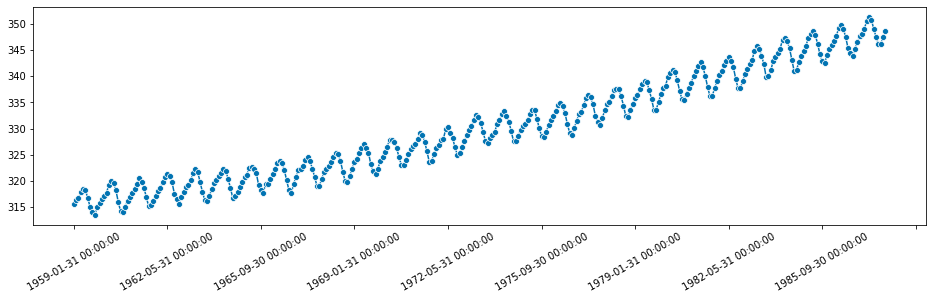

In [9]:
plot_series(co2);
plt.xticks(rotation=30);

# STL using default parameter


## STL parameters

### `seasonal`:
* Determines the window size for LOESS used when smoothing the seasonal component (i.e, the cycle-subseries). 
 
* The cycle-subseries is the time series formed by the sequence of values from the same period in the seasonal cycle (e.g., the sequence of all the values which occured on January over each year, the sequence of all the values which occured on February over each year, etc.). 

* This parameter determines how smooth the seasonal component is for the same period (e.g., every January) across multiple seasonal cycles (e.g, multiple years).

### `period`: 
* The periodicity of the seasonal component (for yearly seasonality and monthly data, this would be 12 because the seasonal pattern repeats every 12 periods). 
* This variable is used to determine the cycle-subseries and also in the low pass filtering step of the algorithm.

### `robust`: 
* A flag to use robustness weights during regression in LOESS. This ensures robustness to outliers.

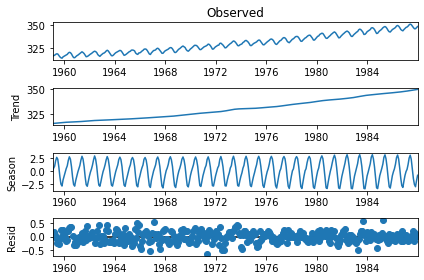

In [11]:
stl = STL(co2).fit()

stl.plot();


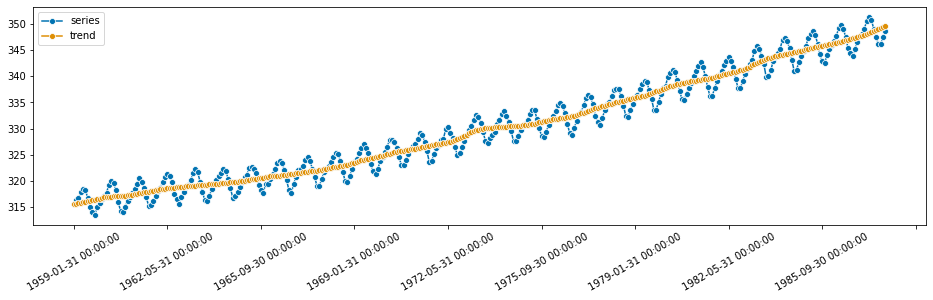

In [21]:
plot_series(co2, stl.trend, labels=['series', 'trend']);
plt.xticks(rotation=30);


**The key inputs into STL are:**

* `seasonal` - The length of the seasonal smoother. `Must be odd.`

* `trend` - The length of the trend smoother, `usually around 150% of season`. `Must be odd and larger than season`.

* `low_pass` - The length of the low-pass estimation window, `usually the smallest odd number larger than the periodicity of the data`.

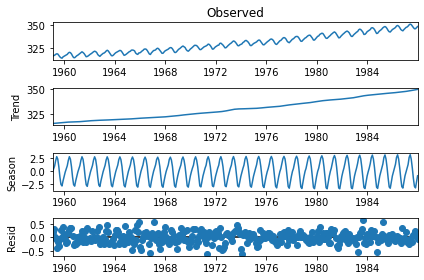

In [15]:
stl = STL(co2, seasonal=13, trend=19, low_pass=13).fit()

stl.plot();

# Robustness to outliers

### sample data

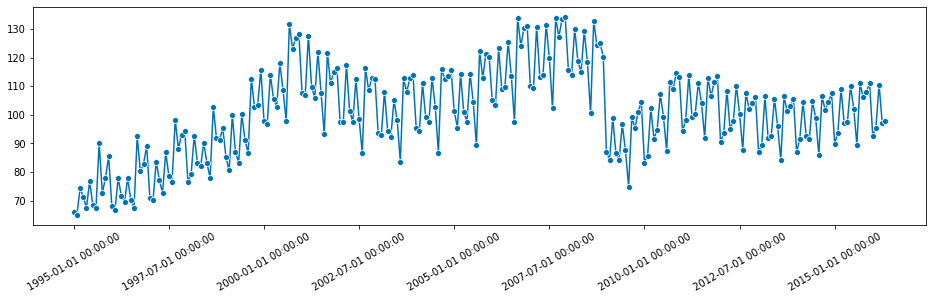

In [18]:
from statsmodels.datasets import elec_equip as ds

elec_equip = ds.load().data
plot_series(elec_equip);
plt.xticks(rotation=30);

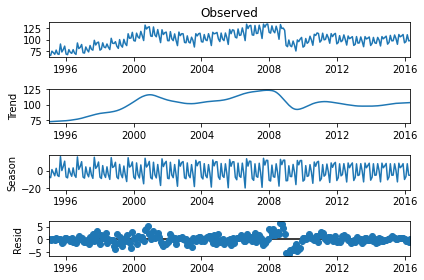

In [22]:
# using default params
stl = STL(elec_equip, period=12).fit()
stl.plot();

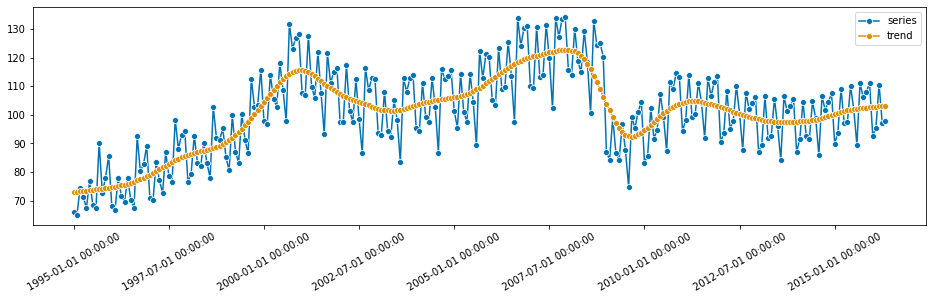

In [29]:
plot_series(elec_equip, stl.trend, labels=['series', 'trend']);
plt.xticks(rotation=30);

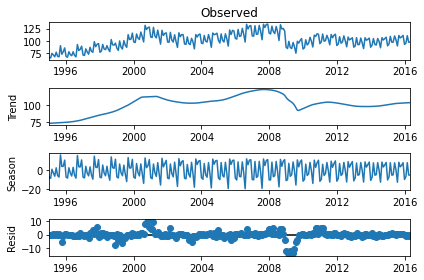

In [30]:
# setting robust to true 
stl = STL(elec_equip, period=12, robust=True).fit()
stl.plot();

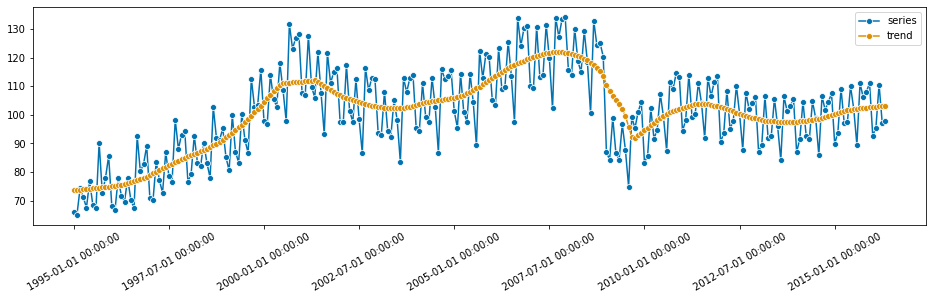

In [31]:
plot_series(elec_equip, stl.trend, labels=['series', 'trend']);
plt.xticks(rotation=30);

### robust vs non robust 

In [32]:
robust = STL(elec_equip, period=12, robust=True).fit()
non_robust = STL(elec_equip, period=12, robust=False).fit()

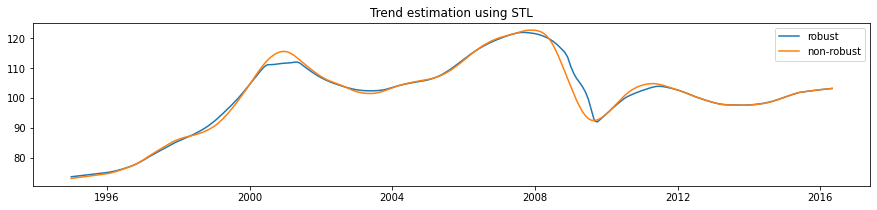

In [36]:
plt.figure(figsize=(15,3))
plt.plot(robust.trend, label='robust')
plt.plot(non_robust.trend, label='non-robust')
plt.legend()
plt.title('Trend estimation using STL');

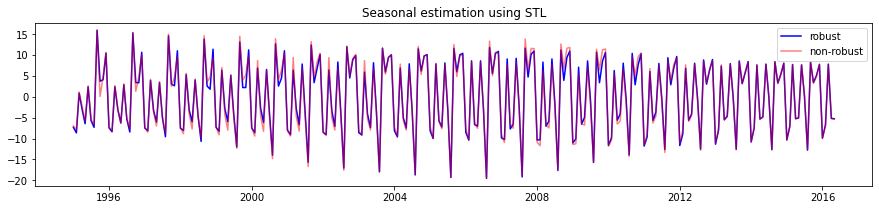

In [47]:
plt.figure(figsize=(15,3))
plt.plot(robust.seasonal, label='robust', c='blue')
plt.plot(non_robust.seasonal, label='non-robust', c='red', alpha=0.5)
plt.legend()
plt.title('Seasonal estimation using STL');

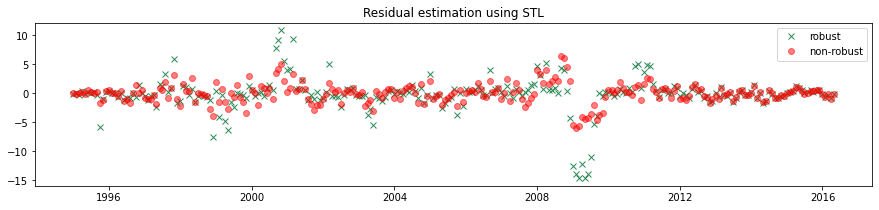

In [54]:
plt.figure(figsize=(15,3))
plt.plot(robust.resid, label='robust', c='seagreen', linestyle='', marker='x')
plt.plot(non_robust.resid, label='non-robust', c='red', alpha=0.5, linestyle='', marker='o')
plt.legend()
plt.title('Residual estimation using STL');